In [2]:
import pandas as pd
import numpy as np
import pickle
import os
import warnings

from src.pdb_to_dfs import process_pdb
from src.protein_calc import get_protein_distances, get_protein_angles, get_protein_dihedrals

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

warnings.filterwarnings("ignore")

In [6]:
pdbs_folder = "data/processed_pdbs"
pdb_list = [pdb for pdb in os.listdir(pdbs_folder) if pdb.endswith(".pdb") ]
wanted_resnames = ["ARG", "GLN", "GLU", "HIS", "ILE", "LYS", "MET", "PHE", "TRP", "TYR"]

In [23]:
bb_distances = []
bs_distances = []
bs_residues = []

for pdb in pdb_list:
    try:
        dfs, chain_types = process_pdb(pdb)

    except Exception as e:
        print(f"Error processing {pdb}: {e}")
        continue
    
    for df, chain_type in zip(dfs, chain_types):
        if chain_type == "protein":
            (
                _bb_distances,
                _bs_distances
            ) = get_protein_distances(df)

            bb_distances.extend(_bb_distances)
            bs_distances.extend(_bs_distances)

            bs_residues.extend(df["residue"].values)
            
df_bs_distances = pd.DataFrame({"distance": bs_distances, "residue": bs_residues})
bb_distances = np.array(bb_distances)
bb_distances.shape


Nucleotide 1 in chain B has missing atoms.
Nucleotide 1 in chain B has missing atoms.
Nucleotide 1 in chain B has missing atoms.
Nucleotide 9995 in chain B has missing atoms.
Nucleotide 9 in chain B has missing atoms.
Nucleotide 6 in chain C has missing atoms.
Nucleotide 15 in chain C has missing atoms.
Nucleotide 17 in chain C has missing atoms.
Nucleotide 18 in chain C has missing atoms.
Nucleotide 20 in chain C has missing atoms.
Nucleotide 25 in chain C has missing atoms.
Nucleotide 1 in chain B has missing atoms.
Nucleotide 1 in chain F has missing atoms.
Nucleotide 9 in chain G has missing atoms.
Nucleotide 1 in chain L has missing atoms.
Nucleotide 1 in chain H has missing atoms.
Nucleotide 1 in chain I has missing atoms.
Nucleotide 1 in chain C has missing atoms.
Nucleotide 1 in chain D has missing atoms.
Nucleotide 923 in chain C has missing atoms.
Nucleotide 935 in chain D has missing atoms.
Nucleotide 11 in chain D has missing atoms.
Nucleotide 1 in chain B has missing atoms

(60260,)

In [63]:
df_bs_distances.dropna(inplace=True)

In [24]:
wanted_resnames = ["ARG", "GLN", "GLU", "HIS", "ILE", "LYS", "MET", "PHE", "TRP", "TYR"]

df_bs_distances = df_bs_distances[df_bs_distances["residue"].isin(wanted_resnames)]

In [25]:
# Map each residue to a number
residue_to_number = {residue: i for i, residue in enumerate(wanted_resnames)}
resname_to_number

{'ARG': 0,
 'GLN': 1,
 'GLU': 2,
 'HIS': 3,
 'ILE': 4,
 'LYS': 5,
 'MET': 6,
 'PHE': 7,
 'TRP': 8,
 'TYR': 9}

<AxesSubplot: xlabel='distance', ylabel='Count'>

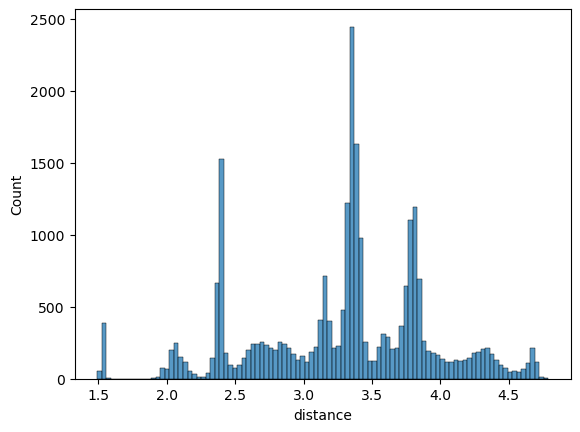

In [65]:
sns.histplot(data=df_bs_distances, x="distance", bins=100)

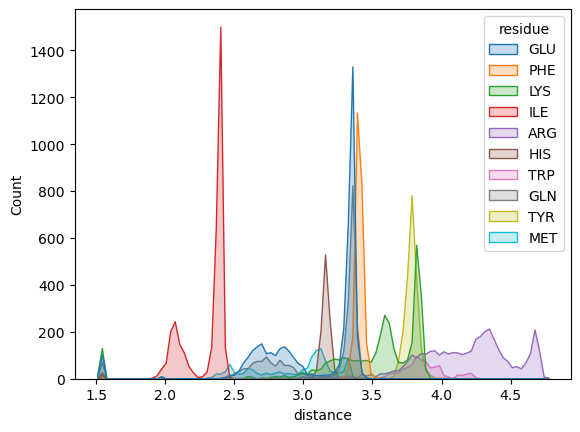

In [66]:
plot = sns.histplot(data = df_bs_distances, x="distance", hue="residue", bins=100, element="poly")

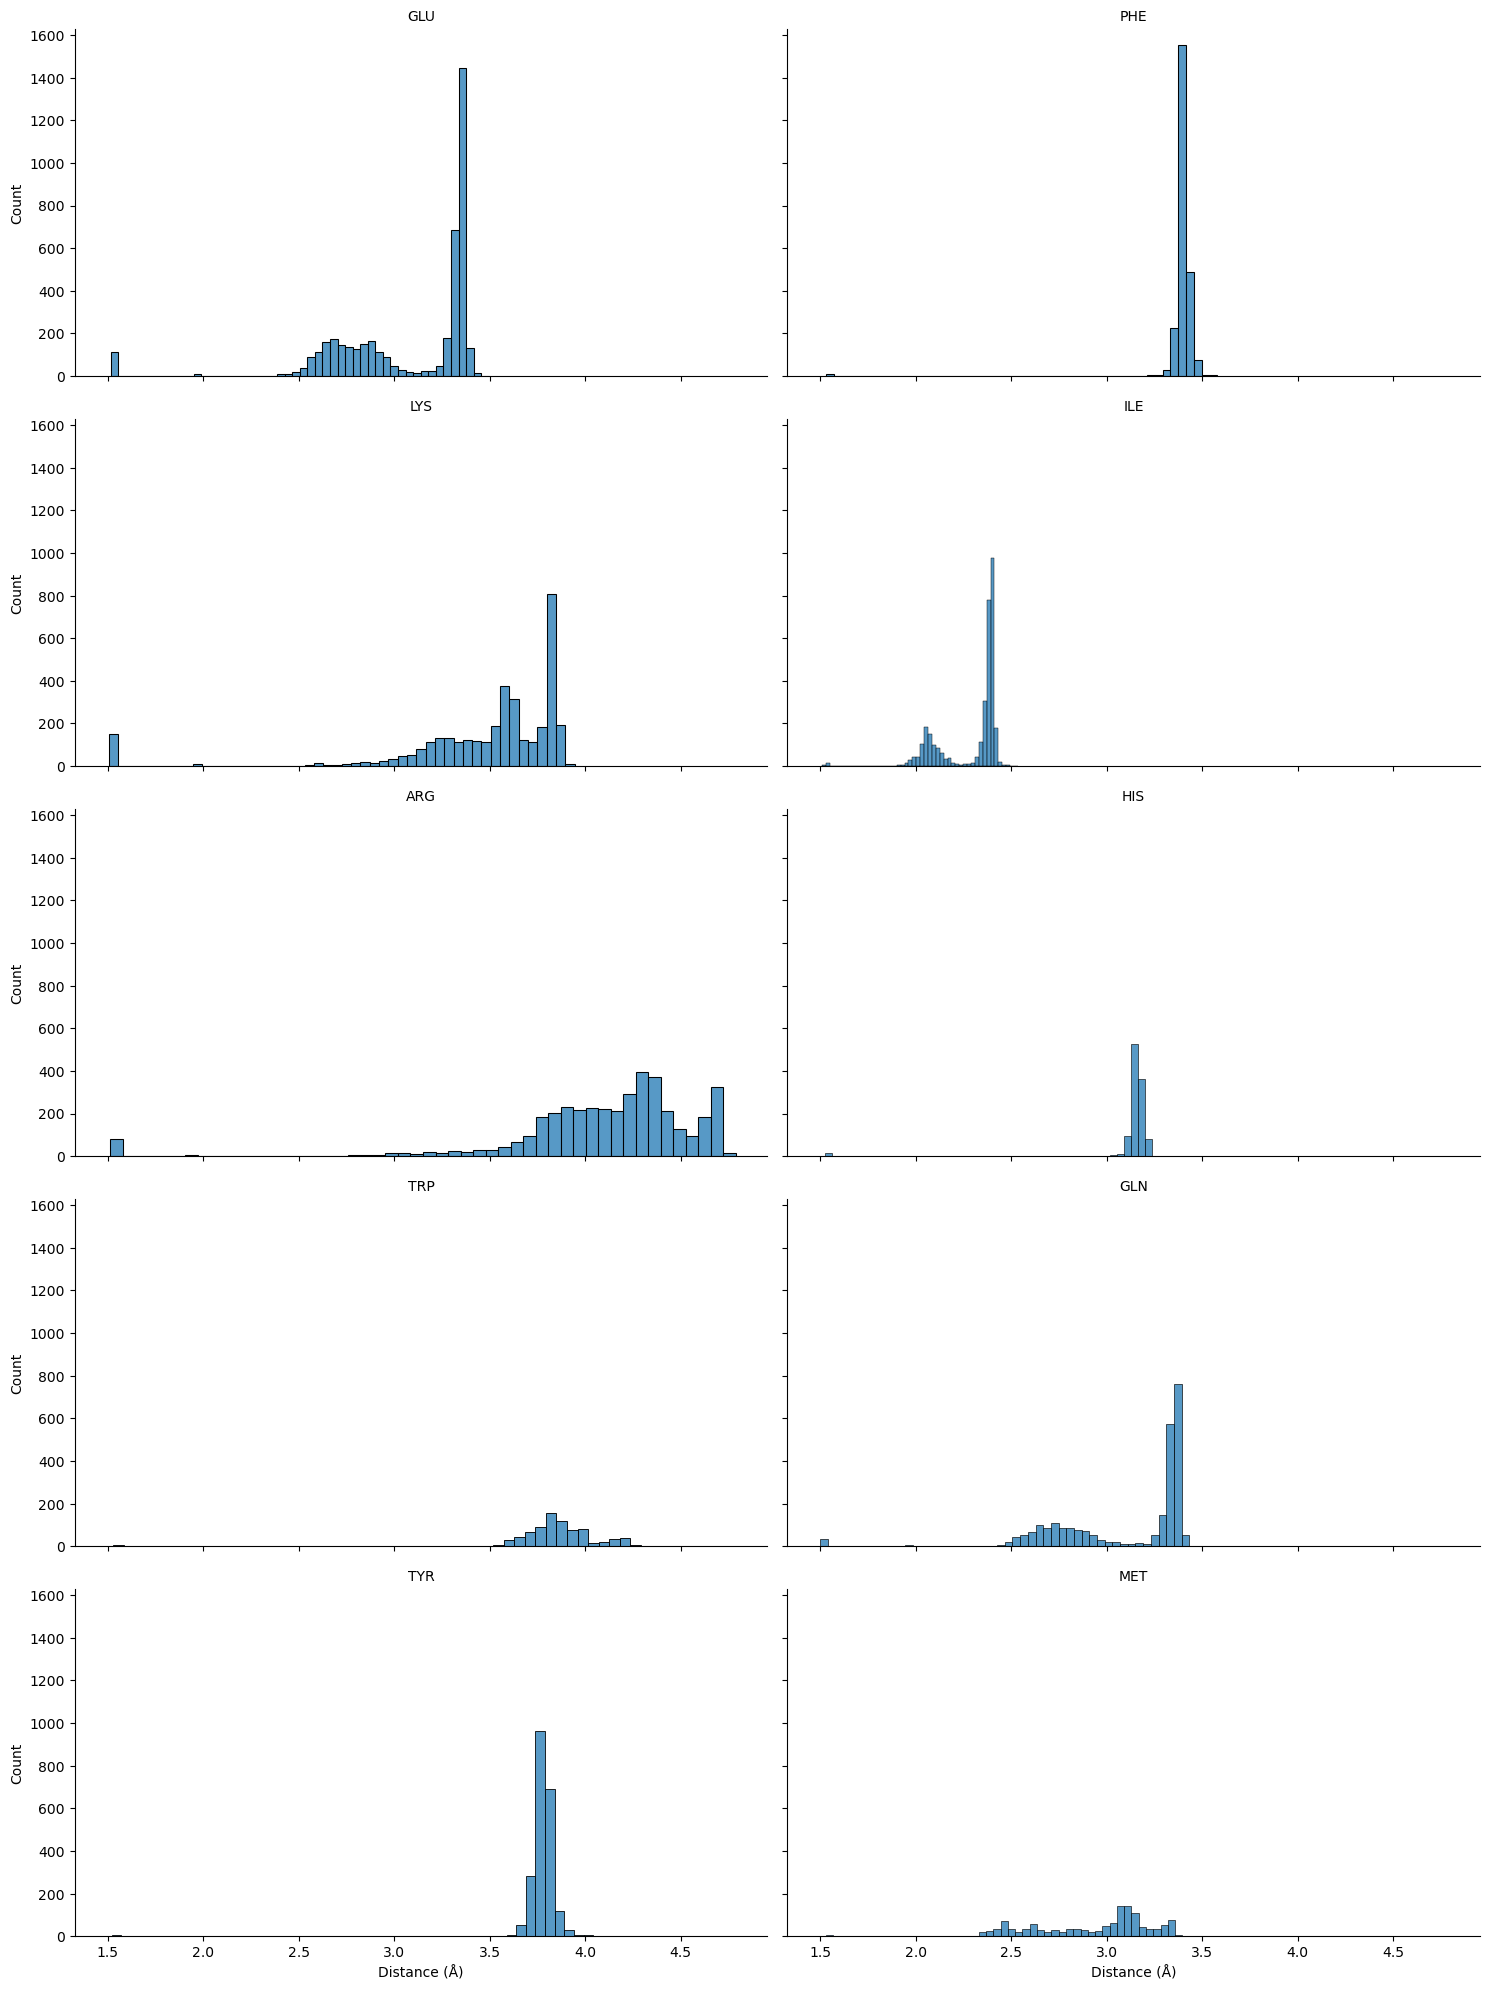

In [67]:
plot = sns.FacetGrid(data=df_bs_distances, col="residue", col_wrap=2, height=3, aspect=1)
plot.figure.set_size_inches(15,20)
plot.map(sns.histplot, "distance", bins=50)
plot.set_axis_labels("Distance (Å)", "Count")
plot.set_titles("{col_name}")
plt.show()


In [9]:
df_bs_distances.groupby("residue").mean()

,distance
residue,
ARG,4.099299
GLN,3.103542
GLU,3.067297
HIS,3.136257
ILE,2.296501
LYS,3.464171
MET,2.916661
PHE,3.395535
TRP,3.855919


In [80]:
df_bs_distances[df_bs_distances["residue"]=="GLU"]

,distance,residue
0,3.333793,GLU
21,3.351454,GLU
33,3.341653,GLU
93,3.360022,GLU
100,3.357259,GLU
...,...,...
60434,3.338874,GLU
60465,2.720062,GLU
60467,3.307373,GLU
60475,3.367522,GLU


In [84]:
binner(df_bs_distances[df_bs_distances["residue"]=="ARG"], 20)

                  Kb Values                   
┏━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┓
┃ Bin ┃ Mean   ┃ Density ┃ U      ┃ Kb       ┃
┡━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━┩
│ 0   │ 1.5946 │ 0.02    │ 5.664  │ 232.00   │
│ 1   │ 1.7584 │ 0.00    │ inf    │ inf      │
│ 2   │ 1.9222 │ 0.00    │ 12.156 │ 686.24   │
│ 3   │ 2.0860 │ 0.00    │ inf    │ inf      │
│ 4   │ 2.2498 │ 0.00    │ inf    │ inf      │
│ 5   │ 2.4136 │ 0.00    │ 16.624 │ 1718.81  │
│ 6   │ 2.5774 │ 0.00    │ 12.156 │ 1614.70  │
│ 7   │ 2.7412 │ 0.00    │ 11.438 │ 2023.57  │
│ 8   │ 2.9049 │ 0.00    │ 9.709  │ 2400.29  │
│ 9   │ 3.0687 │ 0.01    │ 7.757  │ 2866.65  │
│ 10  │ 3.2325 │ 0.01    │ 7.363  │ 4502.55  │
│ 11  │ 3.3963 │ 0.02    │ 6.101  │ 7326.82  │
│ 12  │ 3.5601 │ 0.03    │ 5.114  │ 17138.57 │
│ 13  │ 3.7239 │ 0.08    │ 2.262  │ 69790.56 │
│ 14  │ 3.8877 │ 0.14    │ 0.924  │ 26636.16 │
│ 15  │ 4.0515 │ 0.14    │ 0.883  │ 2892.04  │
│ 16  │ 4.2153 │ 0.18    │ 0.282  │ 334.41   │
│ 17  │ 4.3791 │ 0.20    │ 0.000  │ 0.00     │
│ 18  │ 4.5428 │ 0.07    │ 2.475  │ 907.73   │
│ 19  │ 4.7066 │ 0.11    │ 1.382  │ 339.60   │
└─────┴────────┴─────────┴────────┴──────────┘

Mean Kb: 7442.668436299804

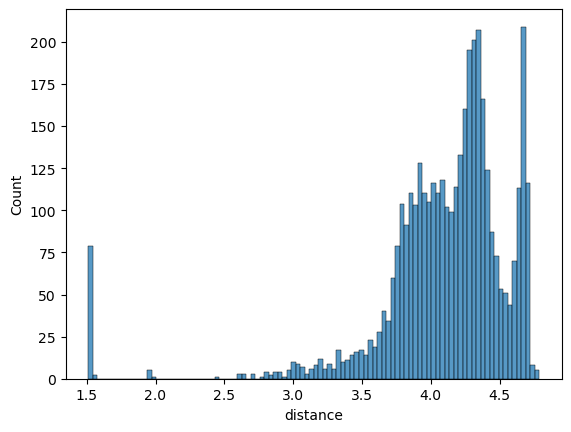

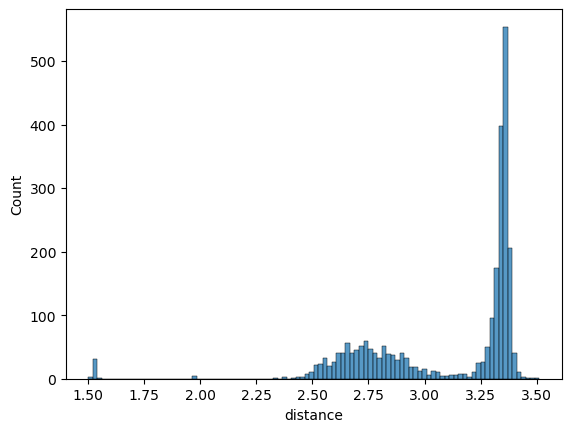

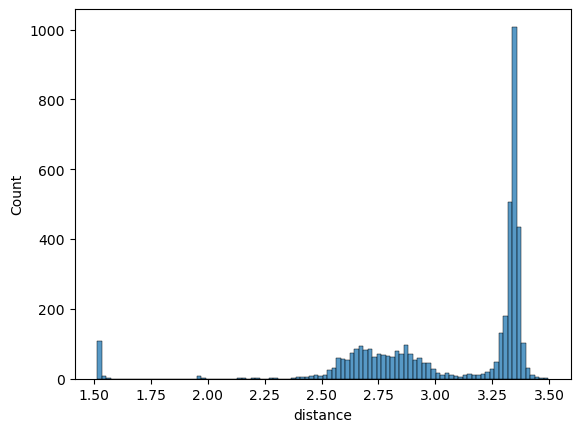

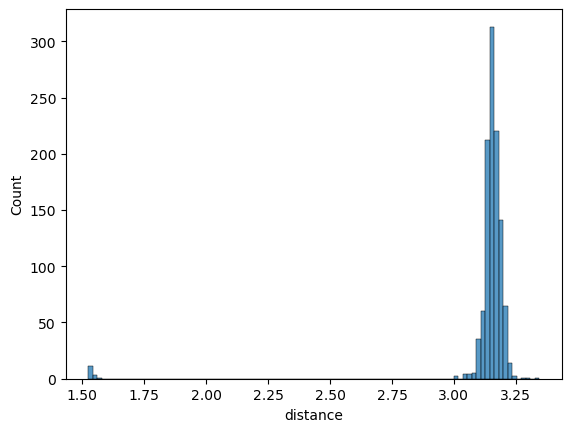

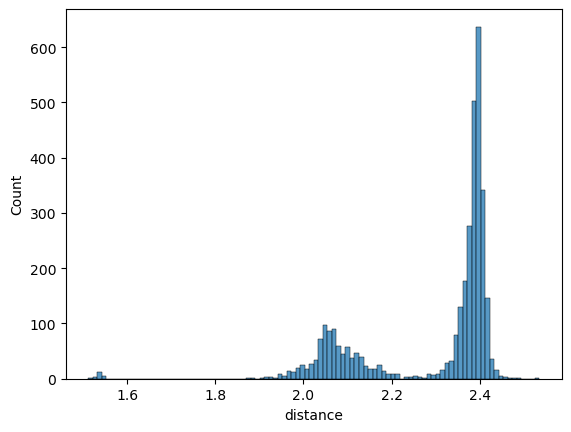

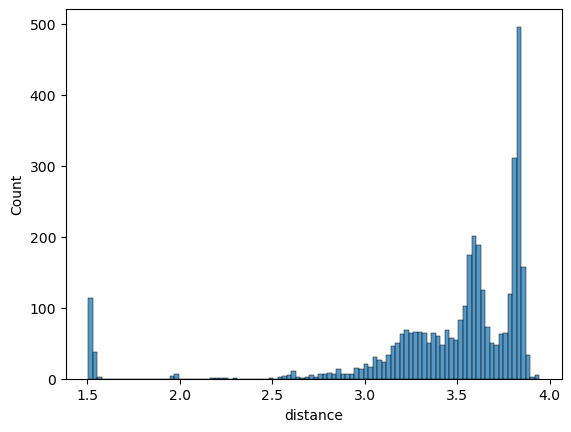

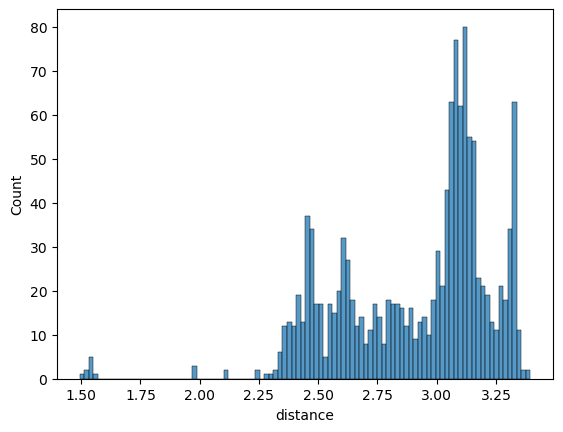

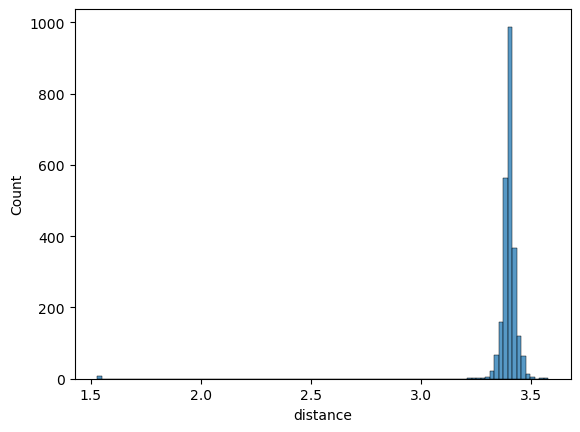

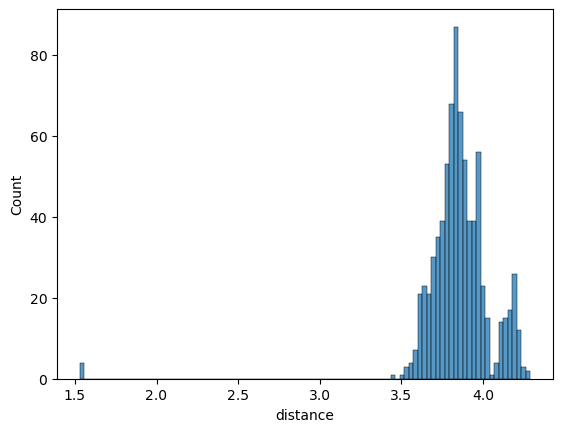

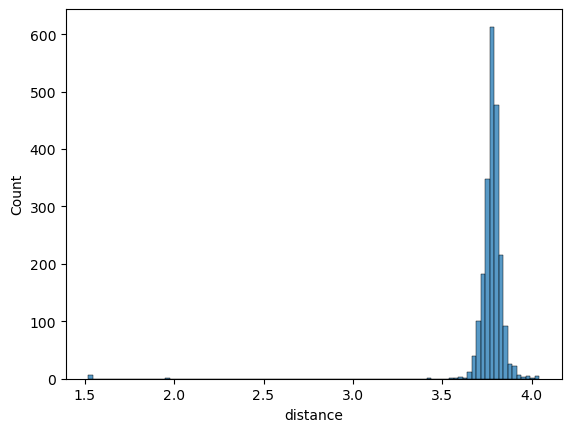

In [10]:
for group in df_bs_distances.groupby("residue"):
    sns.histplot(group[1]["distance"], bins=100, label=group[0])
    plt.xlabel(xlabel="Distance (Å)")
    plt.ylabel(ylabel="Frequency")
    plt.show()



In [22]:
df_bb_distances = pd.DataFrame({"distance": bb_distances})
df_bb_distances.dropna(inplace=True)
df_bb_distances.shape

(60260, 1)

In [58]:
# Save the dataframe
df_bb_distances.to_csv("data/bond/bb_distances.csv", index=False)

In [23]:
df_bb_distances = df_bb_distances[(df_bb_distances["distance"] > 3.4) & (df_bb_distances["distance"] < 4.5)]

In [24]:
df_bb_distances.describe()

,distance
count,60057.000000
mean,3.804219
std,0.021760
min,3.429691
25%,3.793507
50%,3.805068
75%,3.814536
max,4.482224


In [25]:
# get the 1 and 99 percentiles
p1 = np.percentile(df_bb_distances["distance"], 1)
p99 = np.percentile(df_bb_distances["distance"], 99)
print(f"1%: {p1} - 99%: {p99}")

1%: 3.7465539932250977 - 99%: 3.861488075256348


In [26]:
# Remove all the values outside the 1 and 99 percentiles
df_bb_distances = df_bb_distances[(df_bb_distances["distance"] > p1) & (df_bb_distances["distance"] < p99)]


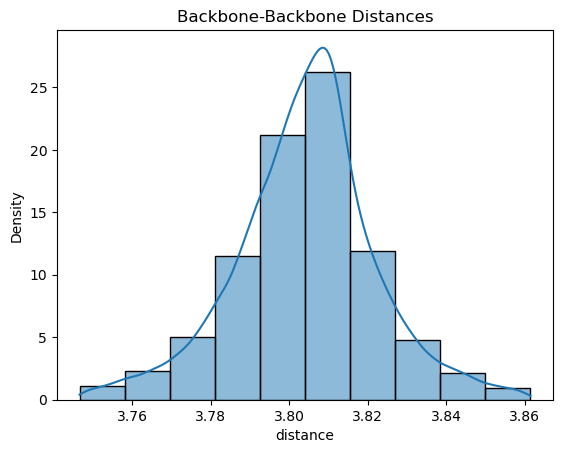

In [27]:
sns.histplot(data=df_bb_distances, x="distance", bins=10, stat="density", kde=True)
# yFormat = FuncFormatter(transform_density)
# plt.gca().yaxis.set_major_formatter(yFormat)
plt.title(label="Backbone-Backbone Distances")
plt.show()

In [87]:
bins/sum(bins)

array([3.40802590e-05, 1.87441425e-04, 9.51691233e-02, 9.03484706e-01,
       9.54247252e-04, 5.11203885e-05, 6.81605180e-05, 1.70401295e-05,
       3.40802590e-05])

In [88]:
bin_width = bin_edges[1] - bin_edges[0]
bin_width

0.11694813

In [116]:
bin_means = (bin_edges[1:] + bin_edges[:-1])/2
bin_means

array([3.7537827, 3.7650623, 3.7763414, 3.7876205, 3.7989001, 3.8101792,
       3.8214588, 3.832738 , 3.844017 , 3.8552966], dtype=float32)

In [30]:
def calculate_U(density):
    return -2.494 * np.log(density)

In [31]:
def calculate_kb_from_U(U, r, r0 = 3.804397):
    return U * 2 * 100 / (r - r0)**2

In [32]:
from rich.table import Table
from rich.console import Console
from rich import print

In [35]:
kb_sum = 0
bins = 10

bin_values , bin_edges = np.histogram(df_bb_distances["distance"], bins=bins)

bin_means = (bin_edges[1:] + bin_edges[:-1])/2
bin_densities = bin_values/sum(bin_values)
bin_U = calculate_U(bin_densities)
bin_U = bin_U - bin_U.min()
bin_kb = calculate_kb_from_U(bin_U, bin_means)

table = Table(title="Kb Values")
table.add_column("Bin")
table.add_column("Mean")
table.add_column("Density")
table.add_column("U")
table.add_column("Kb")

for i in range(bins):
    table.add_row(str(i), f"{bin_means[i]:.4f}", f"{bin_densities[i]:.2f}", f"{bin_U[i]:.3f}", f"{bin_kb[i]:.2f}")
    kb_sum += bin_kb[i]

print(table)


mean_kb = bin_kb.sum()/(bins-1)
print(f"Mean Kb: {mean_kb}")

                   Kb Values                   
┏━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━┓
┃ Bin ┃ Mean   ┃ Density ┃ U     ┃ Kb         ┃
┡━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━┩
│ 0   │ 3.7523 │ 0.01    │ 7.929 │ 584335.21  │
│ 1   │ 3.7638 │ 0.03    │ 6.096 │ 739597.03  │
│ 2   │ 3.7753 │ 0.06    │ 4.133 │ 975488.07  │
│ 3   │ 3.7868 │ 0.13    │ 2.058 │ 1325955.91 │
│ 4   │ 3.7983 │ 0.24    │ 0.537 │ 2864231.61 │
│ 5   │ 3.8098 │ 0.30    │ 0.000 │ 0.00       │
│ 6   │ 3.8213 │ 0.14    │ 1.978 │ 1391396.43 │
│ 7   │ 3.8328 │ 0.05    │ 4.245 │ 1056124.36 │
│ 8   │ 3.8442 │ 0.02    │ 6.290 │ 792294.23  │
│ 9   │ 3.8557 │ 0.01    │ 8.311 │ 630673.80  │
└─────┴────────┴─────────┴───────┴────────────┘

Mean Kb: 1151121.8485507246

In [79]:
def binner(df, bins=10):
    bin_values , bin_edges = np.histogram(df["distance"], bins=bins)

    bin_means = (bin_edges[1:] + bin_edges[:-1])/2
    bin_densities = bin_values/sum(bin_values)
    bin_U = calculate_U(bin_densities)
    bin_U = bin_U - bin_U.min()
    bin_kb = calculate_kb_from_U(bin_U, bin_means)

    table = Table(title="Kb Values")
    table.add_column("Bin")
    table.add_column("Mean")
    table.add_column("Density")
    table.add_column("U")
    table.add_column("Kb")
    kb_sum = 0

    for i in range(bins):
        table.add_row(str(i), f"{bin_means[i]:.4f}", f"{bin_densities[i]:.2f}", f"{bin_U[i]:.3f}", f"{bin_kb[i]:.2f}")
        kb_sum += bin_kb[i]

    print(table)

    # Removing inf and 0 AND NULL values
    bin_kb = bin_kb[~np.isinf(bin_kb)]
    bin_kb = bin_kb[bin_kb != 0]
    bin_kb = bin_kb[~np.isnan(bin_kb)]

    mean_kb = bin_kb.sum()/(bins-1)
    print(f"Mean Kb: {mean_kb}")

In [56]:
# calculate the bins
bins, bin_edges = np.histogram(df_bb_distances["distance"], bins=20)

# Get the bin edges with the highest frequency
max_bin = np.argmax(bins)
max_bin_edges = bin_edges[max_bin:max_bin+2]
max_bin_mean = np.mean(max_bin_edges)

print(f"Max bin mean: {max_bin_mean:.4f}")

# Make new binning around the max bin mean
new_bins = np.linspace(max_bin_mean - 0.1, max_bin_mean + 0.1, 6)
bin_freq, bin_edges = np.histogram(df_bb_distances["distance"], bins=new_bins)

bin_means = (bin_edges[1:] + bin_edges[:-1])/2
bin_densities = bin_freq/sum(bin_freq)
bin_U = calculate_U(bin_densities)
bin_U = bin_U - bin_U.min()
bin_kb = calculate_kb_from_U(bin_U, bin_means, r0=max_bin_mean)

table = Table(title="Kb Values")
table.add_column("Bin")
table.add_column("Mean")
table.add_column("Density")
table.add_column("U")
table.add_column("Kb")

for i in range(len(bin_kb)):
    table.add_row(str(i), f"{bin_means[i]:.4f}", f"{bin_densities[i]:.4f}", f"{bin_U[i]:.3f}", f"{bin_kb[i]:.2f}")

print(table)

# Removing inf and 0 AND NULL values
bin_kb = bin_kb[~np.isinf(bin_kb)]
bin_kb = bin_kb[bin_kb != 0]
bin_kb = bin_kb[~np.isnan(bin_kb)]

mean_kb = bin_kb.mean()
print(f"Mean Kb: {mean_kb}")

Max bin mean: 3.8069

                   Kb Values                   
┏━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┓
┃ Bin ┃ Mean   ┃ Density ┃ U      ┃ Kb        ┃
┡━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━┩
│ 0   │ 3.7269 │ 0.0003  │ 19.788 │ 618373.46 │
│ 1   │ 3.7669 │ 0.1501  │ 4.041  │ 505068.79 │
│ 2   │ 3.8069 │ 0.7588  │ 0.000  │ nan       │
│ 3   │ 3.8469 │ 0.0908  │ 5.295  │ 661928.97 │
│ 4   │ 3.8869 │ 0.0000  │ inf    │ inf       │
└─────┴────────┴─────────┴────────┴───────────┘

Mean Kb: 595123.7425752813

In [53]:
(3.8069 - 3.7669)**2

0.001600000000000003

In [111]:
mean_r = 3.804397
def density_to_kb(density, r):
    return -2.494 * np.log(density) * 2 * 100 / (r - mean_r)**2

In [49]:
density_to_U(0.01908)

197480.63689454406

In [7]:
mean = df_bb_distances["distance"].mean()
std = df_bb_distances["distance"].std()

# Normalize the data

df_bb_distances["distance"] = (df_bb_distances["distance"] - mean) / std


<AxesSubplot: >

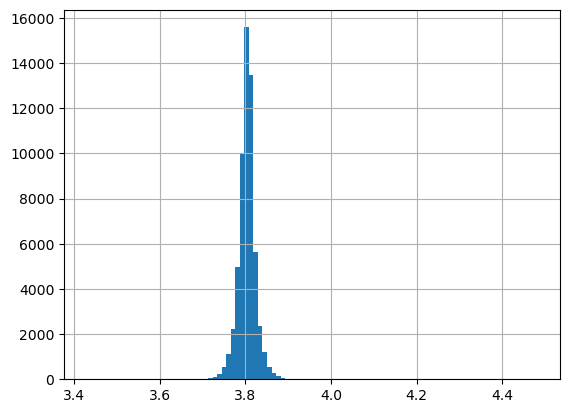

In [78]:
df_bb_distances["distance"].hist(bins=100)

In [4]:
bbb_angles = []
bbs_angles = []
bbs_residues = []
sbb_angles = []
sbb_residues = []

for pdb in pdb_list:
    try:
        dfs, chain_types = process_pdb(pdb)

    except Exception as e:
        print(f"Error processing {pdb}: {e}")
        continue
    
    for df, chain_type in zip(dfs, chain_types):
        if chain_type == "protein":
            (
                _bbb_angles,
                _bbs_angles,
                _sbb_angles 
            ) = get_protein_angles(df)

            bbb_angles.extend(_bbb_angles)
            bbs_angles.extend(_bbs_angles)
            sbb_angles.extend(_sbb_angles)

            bbs_residues.extend(df["residue"].values[1:])
            sbb_residues.extend(df["residue"].values[:-1])

bbb_angles = np.array(bbb_angles)
bbs_angles = np.array(bbs_angles)
sbb_angles = np.array(sbb_angles)

bbb_angles.shape, bbs_angles.shape, sbb_angles.shape

Nucleotide 1 in chain B has missing atoms.
Nucleotide 1 in chain B has missing atoms.
Nucleotide 1 in chain B has missing atoms.
Nucleotide 9995 in chain B has missing atoms.
Nucleotide 9 in chain B has missing atoms.
Nucleotide 6 in chain C has missing atoms.
Nucleotide 15 in chain C has missing atoms.
Nucleotide 17 in chain C has missing atoms.
Nucleotide 18 in chain C has missing atoms.
Nucleotide 20 in chain C has missing atoms.
Nucleotide 25 in chain C has missing atoms.
Nucleotide 1 in chain B has missing atoms.
Nucleotide 1 in chain F has missing atoms.
Nucleotide 9 in chain G has missing atoms.
Nucleotide 1 in chain L has missing atoms.
Nucleotide 1 in chain H has missing atoms.
Nucleotide 1 in chain I has missing atoms.
Nucleotide 1 in chain C has missing atoms.
Nucleotide 1 in chain D has missing atoms.
Nucleotide 923 in chain C has missing atoms.
Nucleotide 935 in chain D has missing atoms.
Nucleotide 11 in chain D has missing atoms.
Nucleotide 1 in chain B has missing atoms

((60025,), (60260,), (60260,))

In [26]:
# Save the bbb angles in a text file
np.savetxt("text_data/bbb_angles.txt", bbb_angles)

In [7]:
df_bbs = pd.DataFrame({"angle": bbs_angles, "residue": bbs_residues})
df_bbs.dropna(inplace=True)

df_bbs = df_bbs[df_bbs["residue"].isin(wanted_resnames)]

df_bbs.groupby("residue").mean()

# save the df_bbs dataframe
df_bbs.to_csv("data/angles/bbs_angles.csv", index=False)

In [29]:
# Save the bbs angles in a text file for each residue in wanted renames
# File name format is: bbs_angles_s{residue_name_to_number}.txt
for residue in wanted_resnames:
    np.savetxt(f"text_data/bbs_angles_s{residue_to_number[residue]}.txt", df_bbs[df_bbs["residue"] == residue]["angle"].values)

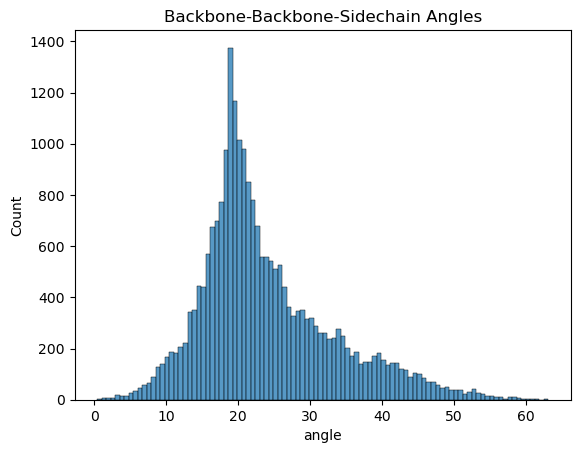

In [8]:
sns.histplot(data=df_bbs, x="angle", bins=100)
plt.title(label="Backbone-Backbone-Sidechain Angles")
plt.show()

In [37]:
df_bbs.groupby("residue").mean()

,angle
residue,
ARG,23.620236
GLN,25.015557
GLU,23.179361
HIS,23.836383
ILE,24.728775
LYS,23.494832
MET,23.277768
PHE,23.138273
TRP,25.311633


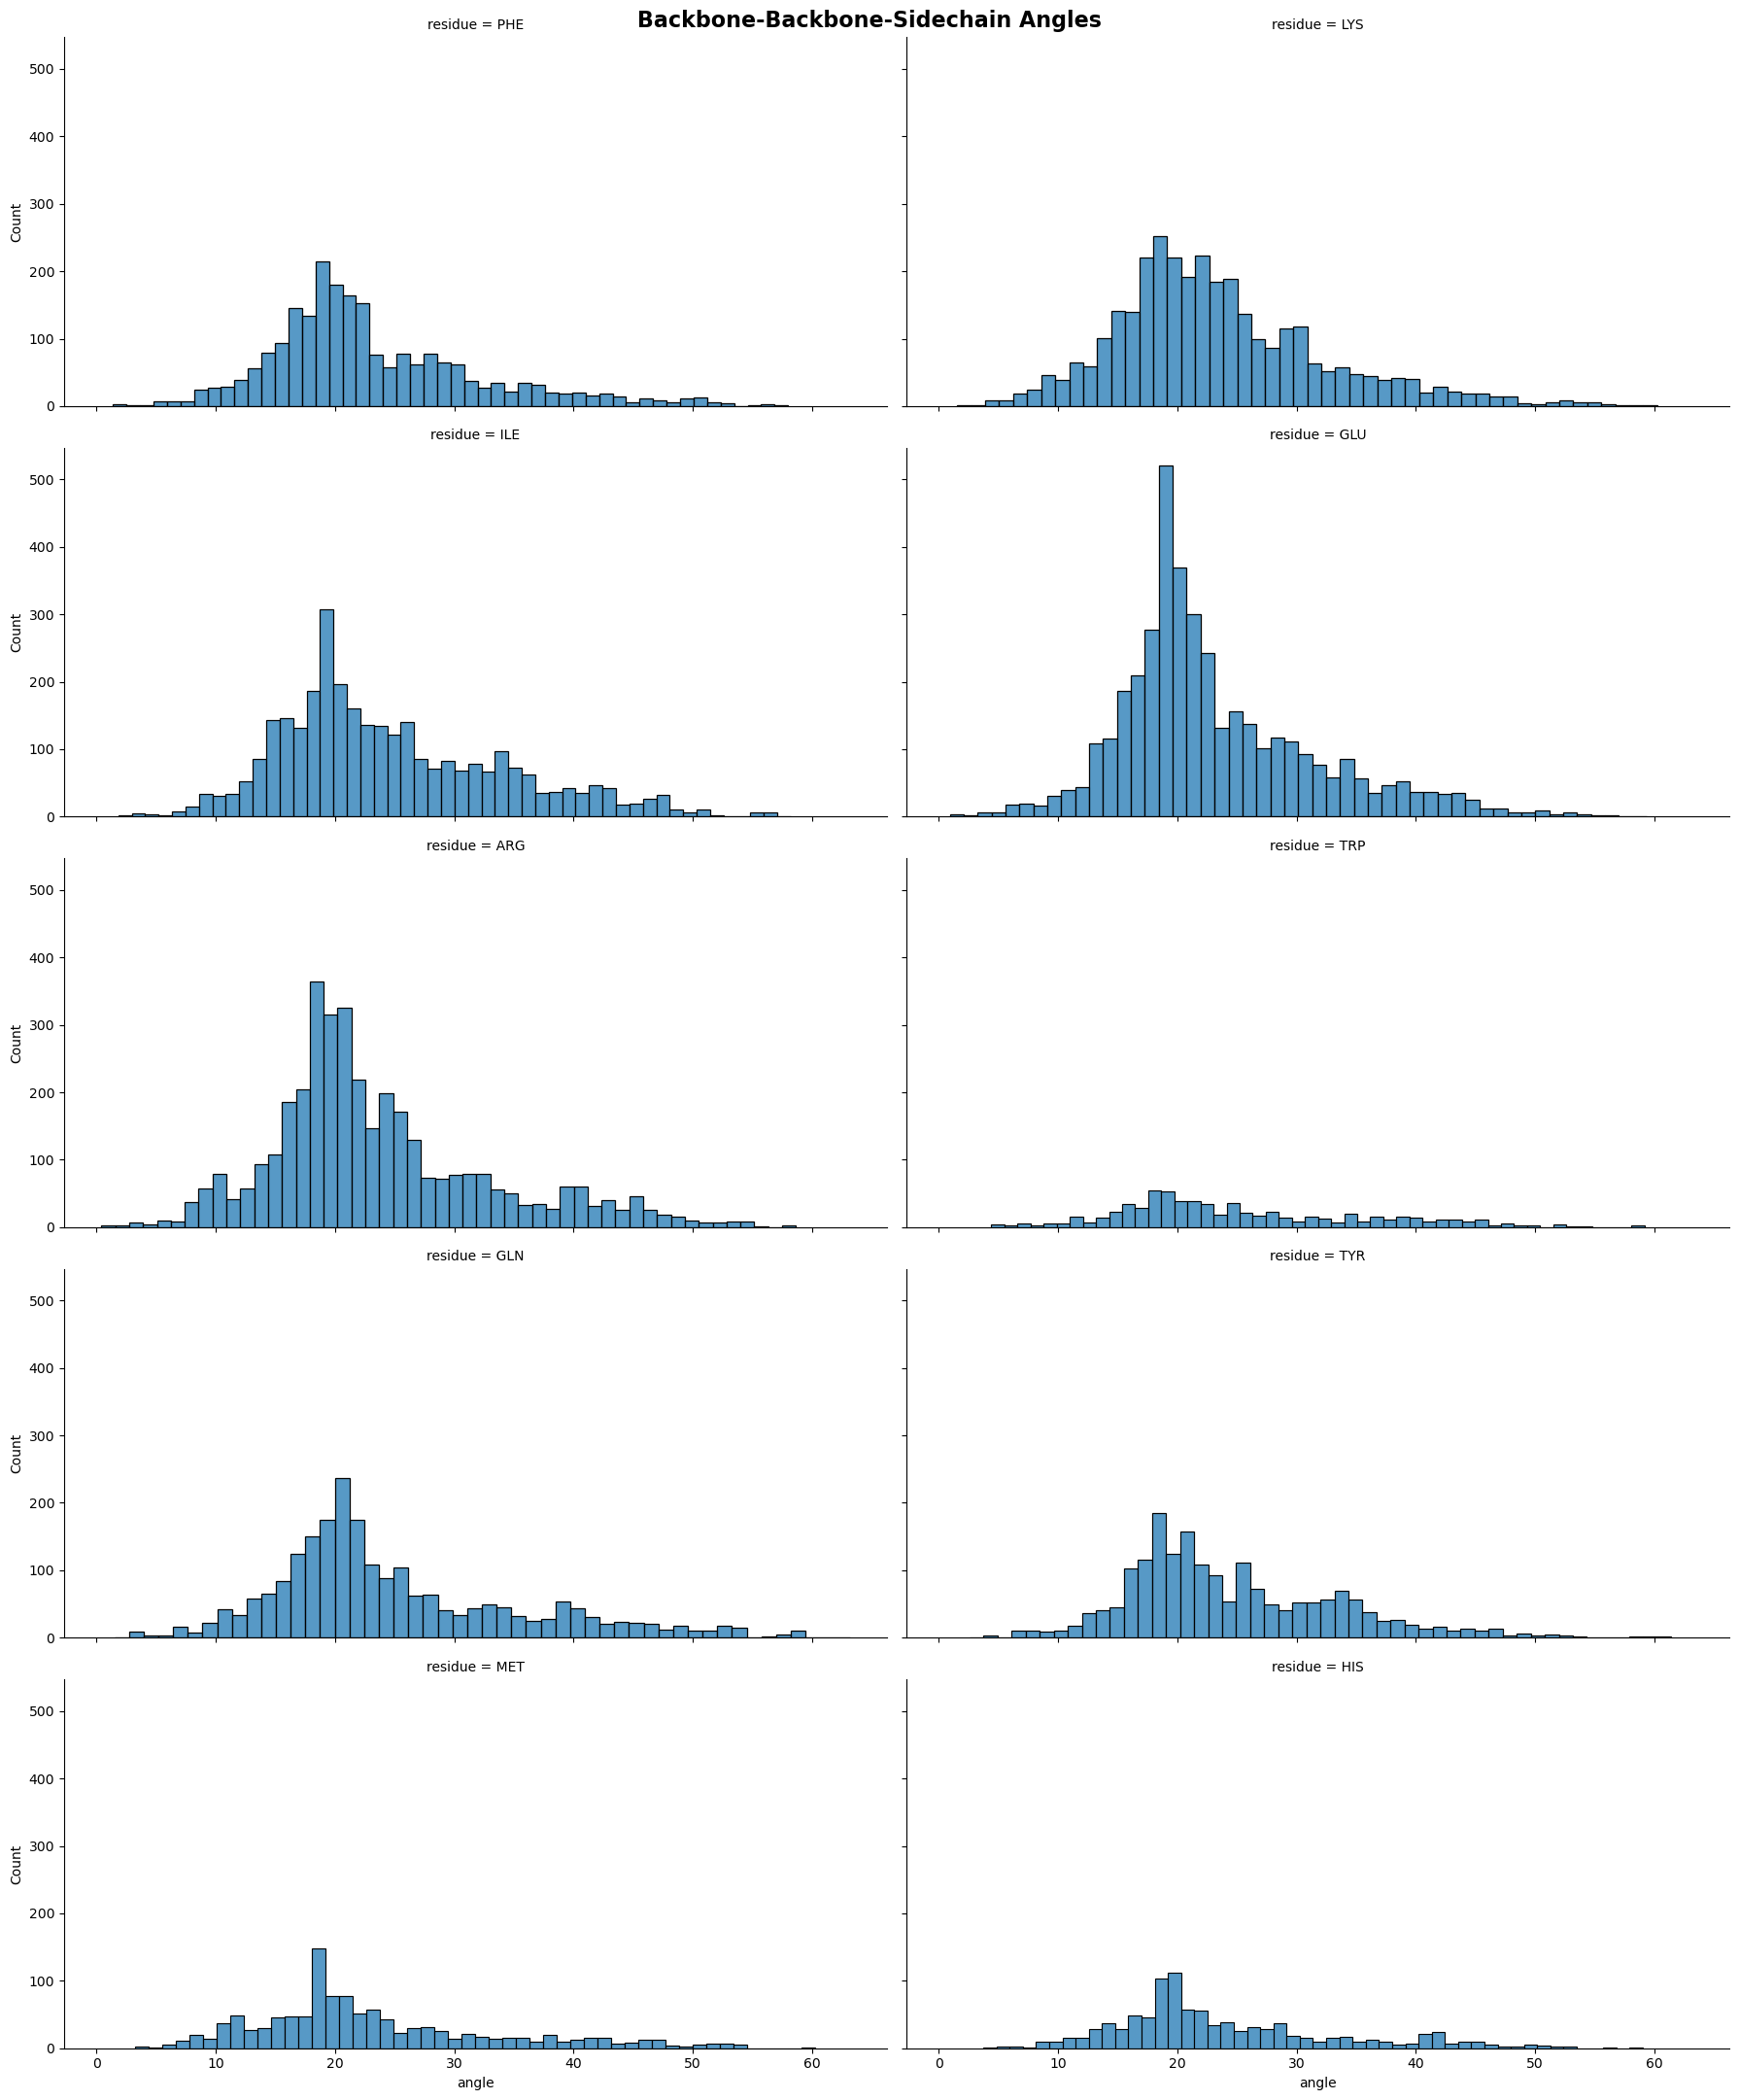

In [44]:
plot = sns.FacetGrid(data=df_bbs, col="residue", col_wrap=2, height=3, aspect=1)
plot.figure.set_size_inches(18,22)
plot.figure.suptitle("Backbone-Backbone-Sidechain Angles", fontsize=16, fontweight="bold")
plot.map(sns.histplot, "angle", bins=50)


In [8]:
df_sbb = pd.DataFrame({"angle": sbb_angles, "residue": sbb_residues})
df_sbb.dropna(inplace=True)

df_sbb = df_sbb[df_sbb["residue"].isin(wanted_resnames)]

df_sbb.groupby("residue").mean()

# save the df_sbb dataframe
df_sbb.to_csv("data/angles/sbb_angles.csv", index=False)

In [32]:
# Save the sbb angles in a text file for each residue in wanted renames
# File name format is: sbb_angles_s{residue_name_to_number}.txt
for residue in wanted_resnames:
    np.savetxt(f"text_data/sbb_angles_s{residue_to_number[residue]}.txt", df_sbb[df_sbb["residue"] == residue]["angle"].values)

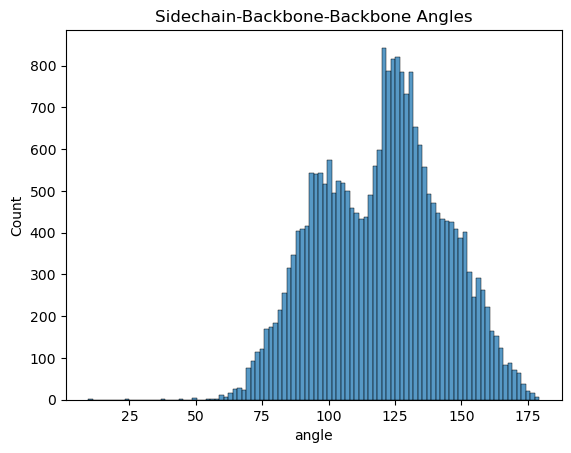

In [54]:
sns.histplot(data=df_sbb, x="angle", bins=100)
plt.title(label="Sidechain-Backbone-Backbone Angles")
plt.show()

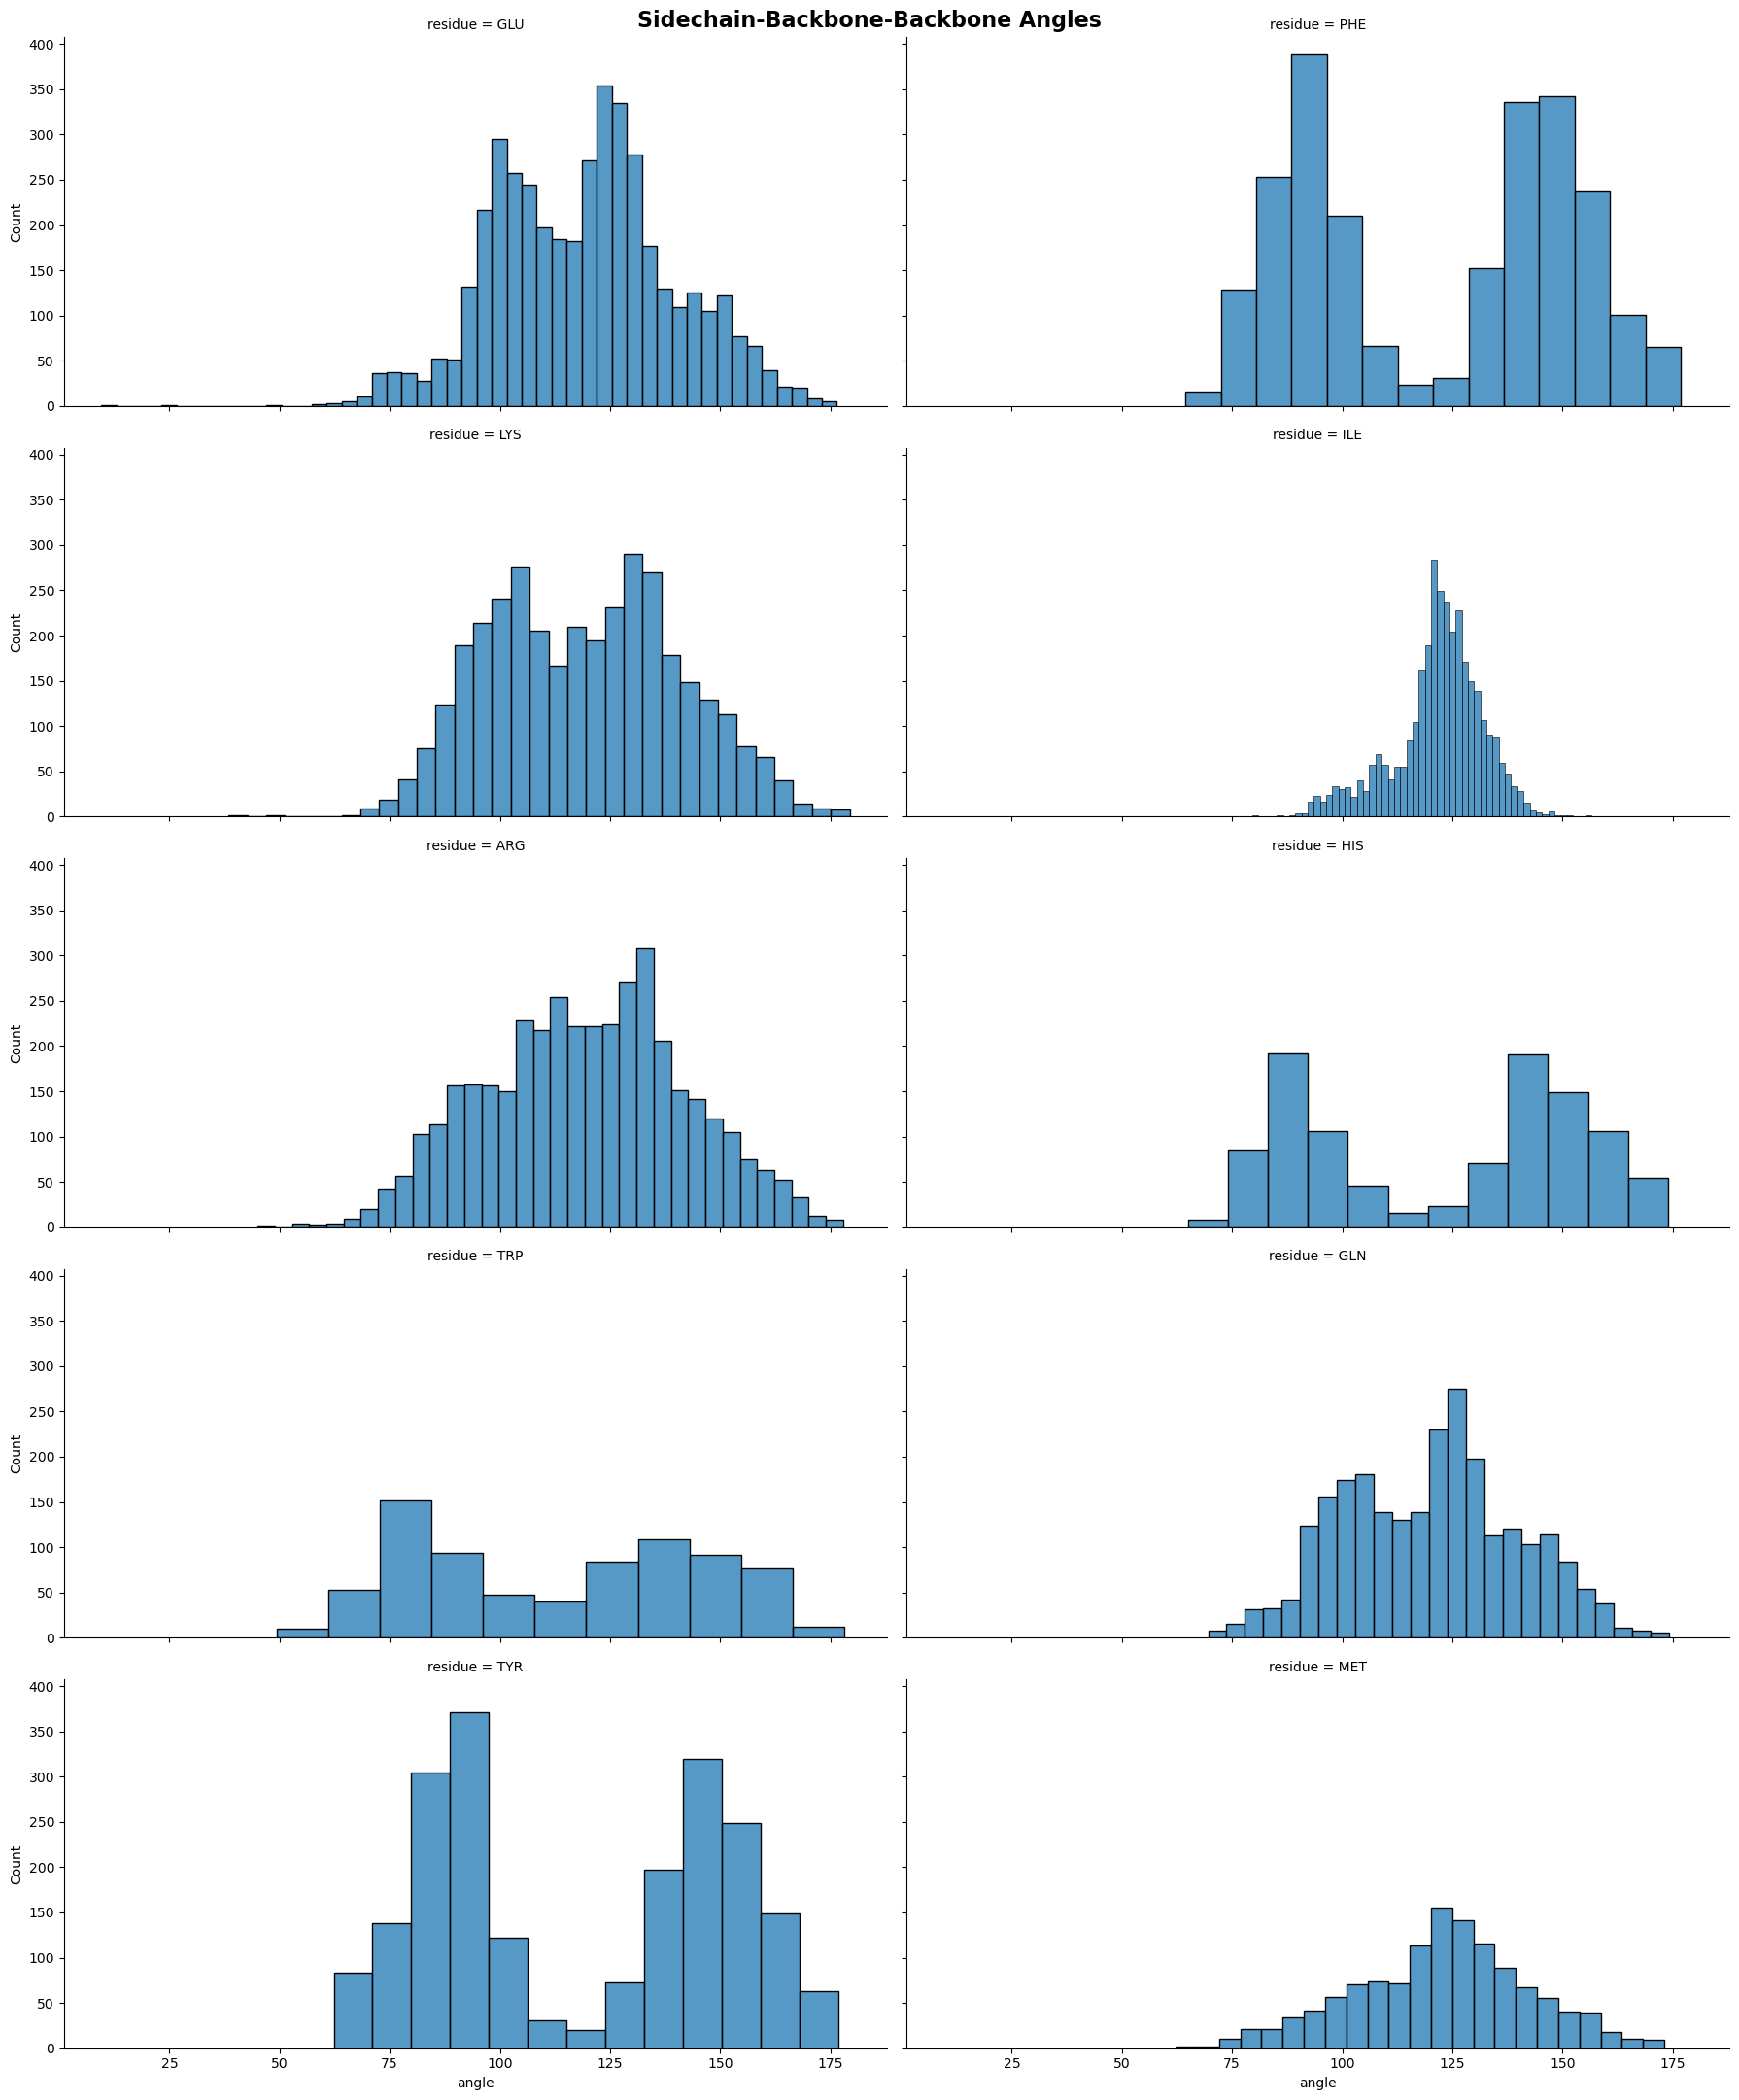

In [57]:
plot = sns.FacetGrid(data=df_sbb, col="residue", col_wrap=2, height=5, aspect=1)
plot.figure.set_size_inches(18,22)
plot.figure.suptitle("Sidechain-Backbone-Backbone Angles", fontsize=16, fontweight="bold")
plot.map(sns.histplot, "angle", stat="count")
plt.show()


In [59]:
bbb_angles_df = pd.DataFrame({"angle": bbb_angles})
bbb_angles_df.dropna(inplace=True)

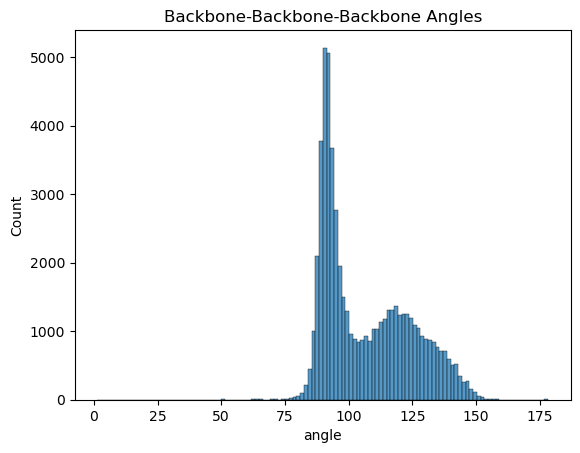

In [69]:
sns.histplot(data=bbb_angles_df, x="angle")
plt.title(label="Backbone-Backbone-Backbone Angles")
plt.show()

In [33]:
bbbb_dihedrals = []
sbbs_diherals = []
sbbb_dihedrals = []
bbbs_diherals = []

for pdb in pdb_list:
    try:
        dfs, chain_types = process_pdb(pdb)

    except Exception as e:
        print(f"Error processing {pdb}: {e}")
        continue
    
    for df, chain_type in zip(dfs, chain_types):
        if chain_type == "protein":
            (
                _bbbb_dihedrals,
                _sbbs_diherals,
                _sbbb_dihedrals,
                _bbbs_diherals
            ) = get_protein_dihedrals(df)

            bbbb_dihedrals.extend(_bbbb_dihedrals)
            sbbs_diherals.extend(_sbbs_diherals)
            sbbb_dihedrals.extend(_sbbb_dihedrals)
            bbbs_diherals.extend(_bbbs_diherals)

bbbb_dihedrals = np.array(bbbb_dihedrals)
sbbs_diherals = np.array(sbbs_diherals)
sbbb_dihedrals = np.array(sbbb_dihedrals)
bbbs_diherals = np.array(bbbs_diherals)

Nucleotide 1 in chain B has missing atoms.
Nucleotide 1 in chain B has missing atoms.
Nucleotide 1 in chain B has missing atoms.
Nucleotide 9995 in chain B has missing atoms.
Nucleotide 9 in chain B has missing atoms.
Nucleotide 6 in chain C has missing atoms.
Nucleotide 15 in chain C has missing atoms.
Nucleotide 17 in chain C has missing atoms.
Nucleotide 18 in chain C has missing atoms.
Nucleotide 20 in chain C has missing atoms.
Nucleotide 25 in chain C has missing atoms.
Nucleotide 1 in chain B has missing atoms.
Nucleotide 1 in chain F has missing atoms.
Nucleotide 9 in chain G has missing atoms.
Nucleotide 1 in chain L has missing atoms.
Nucleotide 1 in chain H has missing atoms.
Nucleotide 1 in chain I has missing atoms.
Nucleotide 1 in chain C has missing atoms.
Nucleotide 1 in chain D has missing atoms.
Nucleotide 923 in chain C has missing atoms.
Nucleotide 935 in chain D has missing atoms.
Nucleotide 11 in chain D has missing atoms.
Nucleotide 1 in chain B has missing atoms

In [34]:
df_bbbb = pd.DataFrame({"dihedral": bbbb_dihedrals})
df_sbbs = pd.DataFrame({"dihedral": sbbs_diherals})
df_sbbb = pd.DataFrame({"dihedral": sbbb_dihedrals})
df_bbbs = pd.DataFrame({"dihedral": bbbs_diherals})

dfs = [df_bbbb, df_sbbs, df_sbbb, df_bbbs]
table_names = ["Backbone-Backbone-Backbone-Backbone", "Sidechain-Backbone-Backbone-Sidechain", "Sidechain-Backbone-Backbone-Backbone", "Backbone-Backbone-Backbone-Sidechain"]


In [36]:
# Save the dihedrals in a text file 

# bbbb
np.savetxt("text_data/bbbb_dihedrals.txt", bbbb_dihedrals)

# sbbs
np.savetxt("text_data/sbbs_dihedrals.txt", sbbs_diherals)

# sbbb
np.savetxt("text_data/sbbb_dihedrals.txt", sbbb_dihedrals)

# bbbs
np.savetxt("text_data/bbbs_dihedrals.txt", bbbs_diherals)

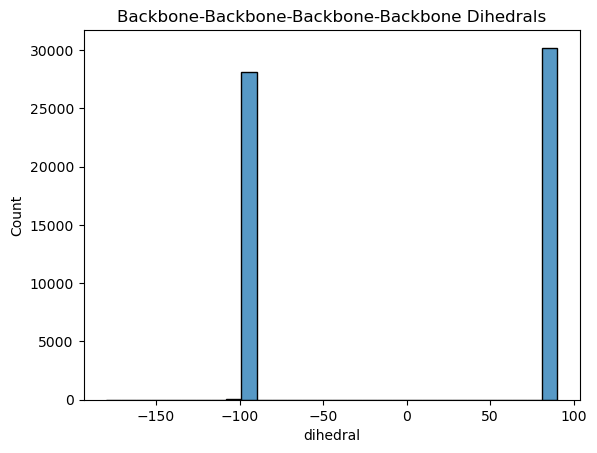

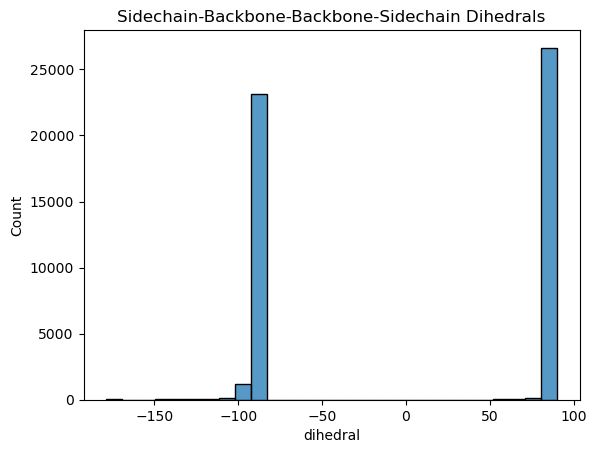

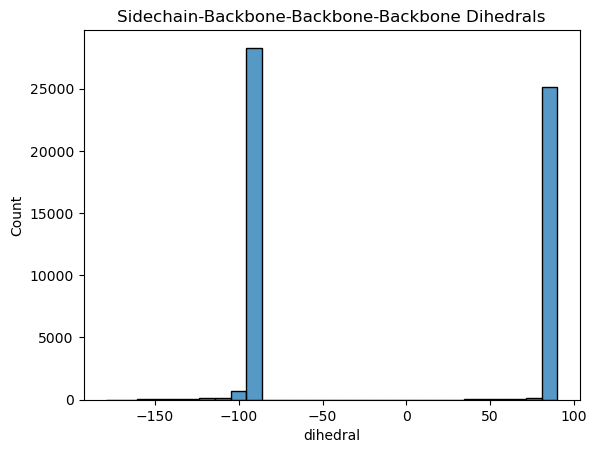

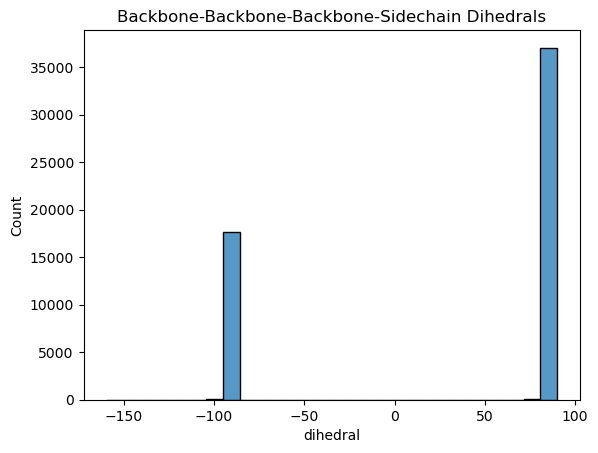

In [75]:
for i, df in enumerate(dfs):
    df.dropna(inplace=True)
    # Remove invalid dihedrals
    df = df[(df["dihedral"] > -180) & (df["dihedral"] < 180)]
    sns.histplot(data=df, x="dihedral")
    plt.title(label=table_names[i] + " Dihedrals")
    plt.show()